<a href="https://colab.research.google.com/github/jdescartes24/Predicting-sales/blob/main/Core_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np



sales_predictions=  '/content/sales_predictions.csv'

sales=pd.read_csv(sales_predictions)

sales.head()



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
sales = sales.rename(columns={'Item_Identifier':'item identifier',
                              'Item_Weight': 'item weight',
                        'Outlet_Size': 'outlet size'})

sales.head()

,item identifier,item weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,outlet size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [5]:
check= sales.groupby(['Item_Type','outlet size'])[["Item_Outlet_Sales"]].sum()
check

Item_Outlet_Sales
Item_Type             outlet size                   
Baking Goods          High              1.497158e+05
                      Medium            4.845007e+05
                      Small             3.225155e+05
Breads                High              5.201829e+04
                      Medium            2.256143e+05
                      Small             1.532745e+05
Breakfast             High              2.735572e+04
                      Medium            1.031431e+05
                      Small             5.147966e+04
Canned                High              1.437322e+05
                      Medium            5.559703e+05
                      Small             3.852685e+05
Dairy                 High              1.962545e+05
                      Medium            5.941286e+05
                      Small             3.762982e+05
Frozen Foods          High              2.036968e+05
                      Medium            7.157510e+05
                      Small             4.719770e+05
Fruits and Vegetables High              3.415268e+05
                      Medium            1.174614e+06
                      Small             6.334528e+05
Hard Drinks           High              5.436257e+04
                      Medium            1.913309e+05
                      Small             9.632595e+04
Health and Hygiene    High              1.191356e+05
                      Medium            4.207743e+05
                      Small             2.623651e+05
Household             High              2.480465e+05
                      Medium            8.293844e+05
                      Small             5.075300e+05
Meat                  High              9.520008e+04
                      Medium            4.160937e+05
                      Small             2.142618e+05
Others                High              3.523813e+04
                      Medium            1.253588e+05
                      Small             8.411051e+04
Seafood               High              8.146729e+03
                      Medium            5.280327e+04
                      Small             5.101027e+04
Snack Foods           High              3.092461e+05
                      Medium            1.142047e+06
                      Small             6.560407e+05
Soft Drinks           High              1.152347e+05
                      Medium            3.339034e+05
                      Small             2.019292e+05
Starchy Foods         High              4.375305e+04
                      Medium            1.243015e+05
                      Small             9.837262e+04

In [6]:
sales.shape

(8523, 12)

In [7]:
sales.dtypes

item identifier               object
item weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
outlet size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
sales.duplicated().any()

False

In [9]:
sales.isnull().sum() 

item identifier                 0
item weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
outlet size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#sales[sales['outlet size'].isnull()]

j=sales[sales['Outlet_Type']== 'Supermarket Type1' ]

b=sales[sales['Outlet_Type']== 'Grocery Store' ]

b['outlet size'].value_counts()

sales['outlet size'].fillna(value = 'Small', inplace = True)

sales.isnull().sum()
# Outlet Size missing values will be changed to small because I notice most of the missing values were from grocery store and Type 1 stores and majory of those store 
#had outlet sizes of small.

item identifier                 0
item weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
outlet size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
sales['outlet size'].value_counts()


Small     4798
Medium    2793
High       932
Name: outlet size, dtype: int64

In [12]:
	sales['item weight'].fillna(value = sales['item weight'].mean(), inplace = True)

# decided to keep it weight and use this function to fill in the gaps because it may be important when it come to shiping cost.

In [13]:
sales.isnull().sum() 
#proof of not more empty values

item identifier              0
item weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
outlet size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
sales.replace(['LF'],['Low Fat'], inplace=True)

sales.replace(['low fat'],['Low Fat'], inplace=True)

sales.replace(['reg'],['Regular'], inplace=True)

sales.replace(['High'],['Large'], inplace=True)

In [15]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
sales['item weight'].describe().round()

count    8523.0
mean       13.0
std         4.0
min         5.0
25%         9.0
50%        13.0
75%        16.0
max        21.0
Name: item weight, dtype: float64

In [17]:
sales['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [18]:
sales['Item_MRP'].describe().round()

count    8523.0
mean      141.0
std        62.0
min        31.0
25%        94.0
50%       143.0
75%       186.0
max       267.0
Name: Item_MRP, dtype: float64

In [19]:
sales['Item_Outlet_Sales'].describe().round()

count     8523.0
mean      2181.0
std       1706.0
min         33.0
25%        834.0
50%       1794.0
75%       3101.0
max      13087.0
Name: Item_Outlet_Sales, dtype: float64

In [20]:
sales.isnull().sum() 
#proof of not more empty values

item identifier              0
item weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
outlet size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Chart to see what stores made the **most** sales 


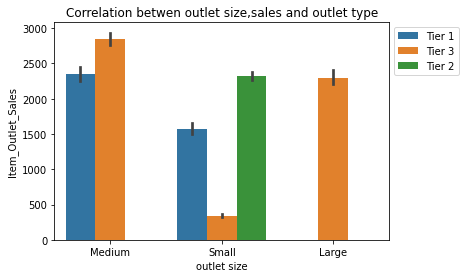

In [21]:
sns.barplot(data=sales, x = 'outlet size', y= 'Item_Outlet_Sales', hue='Outlet_Location_Type' );
plt.title('Correlation betwen outlet size,sales and outlet type');
plt.legend(bbox_to_anchor=(1,1),loc ="upper left");
## It looks like Tier 3 store yeild the most sales but the medium size stores made the most sales

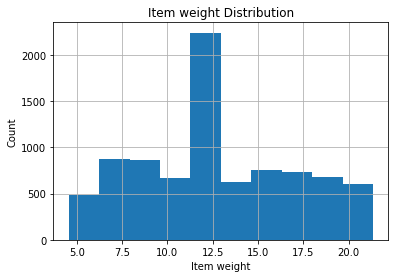

In [51]:
sales['item weight'].hist();
plt.ylabel('Count');
plt.xlabel('Item weight');
plt.title('Item weight Distribution');
# This shows that around 2300 of the items we carry are between the 11 and 13 pound range

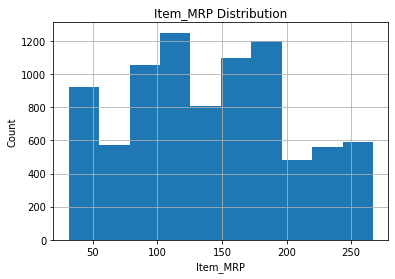

In [48]:
sales['Item_MRP'].hist();
plt.ylabel('Count');
plt.xlabel('Item_MRP');
plt.title('Item_MRP Distribution');

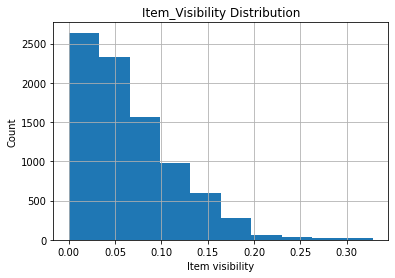

In [47]:
sales['Item_Visibility'].hist();
plt.ylabel('Count');
plt.xlabel('Item visibility');
plt.title('Item_Visibility Distribution');

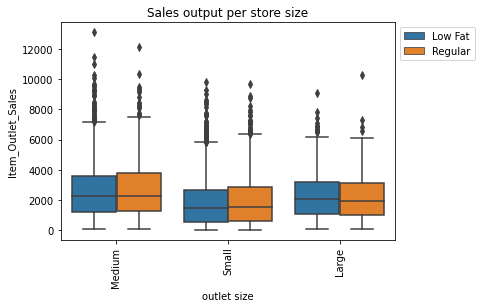

In [62]:
sns.boxplot(x='outlet size', y='Item_Outlet_Sales', hue= 'Item_Fat_Content', data=sales);
plt.legend(bbox_to_anchor= (1,1), loc = 'upper left');
plt.title(label="Sales output per store size");
plt.xticks(rotation= 90);

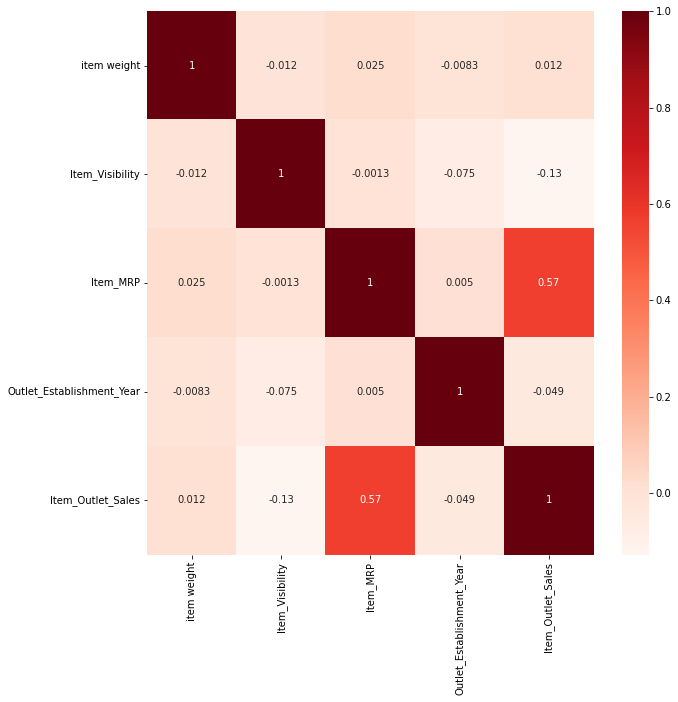

In [64]:

plt.figure(figsize=(10,10))
sns.heatmap(sales.corr(), cmap='Reds', annot=True);

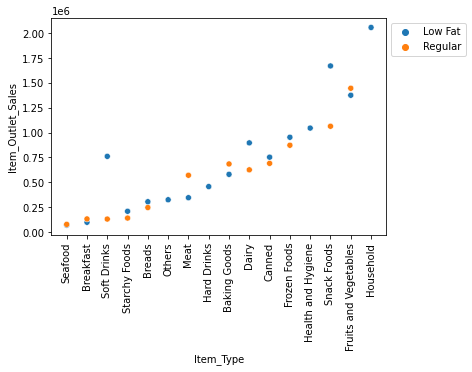

In [22]:
sale_f=sales.groupby(['Item_Type', 'Item_Fat_Content']).sum().reset_index()
sale_f= sale_f.sort_values(by='Item_Outlet_Sales');
sns.scatterplot(data= sale_f, x= 'Item_Type', y= 'Item_Outlet_Sales', hue='Item_Fat_Content');
plt.xticks(rotation = 90);
plt.legend(bbox_to_anchor= (1,1), loc = 'upper left');
